In [48]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets
from sklearn.preprocessing import Imputer

import seaborn as sns

## Read in data as csv 

In [16]:
data=pd.read_table('important_txt/4Kmeans.csv', sep=',')

## Seperate by sex

In [17]:
dudes = data[data['sex'] >= 0]
lady_dudes = data[data['sex'] >= 1]

## Get a List of variable names

In [18]:
var_names=list(lady_dudes.columns.values)

## Combine variables of interest into a single matrix

In [19]:
labels_true=lady_dudes['PDS'].values
f2=lady_dudes['pds_ht2_y'].values
f3=lady_dudes['pds_skin2_y'].values
f4=lady_dudes['pds_bdyhair_y'].values
f5=lady_dudes['pds_f4_2_y'].values
f6=lady_dudes['pds_f5_y'].values
f7=lady_dudes['interview_age'].values
f8=lady_dudes['anthroheightcalc'].values 
f9=lady_dudes['anthroweightcalc'].values
f10=lady_dudes['anthro_waist_cm'].values
f11=lady_dudes['hormone_scr_dhea_mean'].values
f12=lady_dudes['hormone_scr_hse_mean'].values
f13=lady_dudes['hormone_scr_ert_mean'].values
X=np.matrix(zip(f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13))

## Create a list of the variable names included in this analyses

In [20]:
names=['pds_ht2_y',
'pds_skin2_y'
'pds_bdyhair_y',
'pds_f4_2_y',
'pds_f5_y',
'interview_age',
'anthroheightcalc',
'anthroweightcalc',
'anthro_waist_cm',
'hormone_scr_dhea_mean',
'hormone_scr_hse_mean',
'hormone_scr_ert_mean']
len(names)

11

## Check the data 

[(1, 610), (2, 271), (3, 20), (4, 2)]

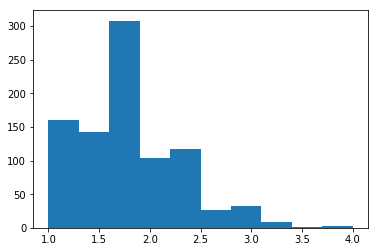

In [21]:
%matplotlib inline
plt.hist(labels_true)
y = np.bincount(labels_true.astype(int))
ii = np.nonzero(y)[0]
zip(ii,y[ii])

An issue is a low number of people in groups 3 and 4

## Possible solution, randomly sample equal numbers
Using the rule of thumb 2^m I need 8 people per cluster 
Possible combinations below

In [22]:
import math
x=math.factorial(70)
y=math.factorial(70-20)
fact=x/y
print(fact)

393849377343759797528386895216640000


## Create target variable (or the one you are comparing)

In [23]:
target_var=pd.DataFrame(lady_dudes['PDS'].values)

## Impute missing values
This will not allow missing data, so have to impute nans

In [24]:
imputer = Imputer()
transformed_values = imputer.fit_transform(X)
# count the number of NaN values in each column
print(np.isnan(transformed_values).sum()) 
transformed_values_scale = scale(transformed_values)
trans = np.hstack((transformed_values_scale,target_var.round(decimals=0)))



0


In [25]:
#def random_selct(data):
dictr = {}
levels = ['lev1','lev2','lev3']
i=1
for lev in levels:
    if i < len(levels)+1:
        dictr[lev] = trans[np.where(trans[:,-1] == i)]
        i=i+1
    else:
        break

rand_dict={}
target_dict={}
for key, value in dictr.iteritems():
    print(key)
    print(value.shape)
    ind = np.random.permutation(value.shape[0])#random index
    training_idx = ind[:20]#get 20 subjects indexes
    training = value[training_idx,:]#select 20 subjects from the value in the dictionary
    labels_true = value[:,-1] #get the labels from the value in the dictiornary last column
    target_dict[key] = labels_true[training_idx]#add targets to dictionary
    rand_dict[key] = training
    


    # for
# ind = np.random.permutation(transformed_values_scale.shape[0])
#dictr['lev3'].shape
rand_dict['lev2'].shape

lev3
(70, 13)
lev2
(529, 13)
lev1
(302, 13)


(20, 13)

## Randomly select data to train on and to test on
It is important that you keep your indices else you won't be able to validate

In [26]:
indices = np.random.permutation(transformed_values_scale.shape[0])

training_idx, test_idx = indices[:721], indices[721:]#80 20
training, test = transformed_values_scale[training_idx,:], transformed_values_scale[test_idx,:]
training_target, test_target = labels_true[training_idx], labels_true[test_idx]

plt.hist(training_target)
y = np.bincount(training_target.astype(int))
ii = np.nonzero(y)[0]
zip(ii,y[ii])

IndexError: index 486 is out of bounds for axis 1 with size 302

# Checking the normality of the data

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *

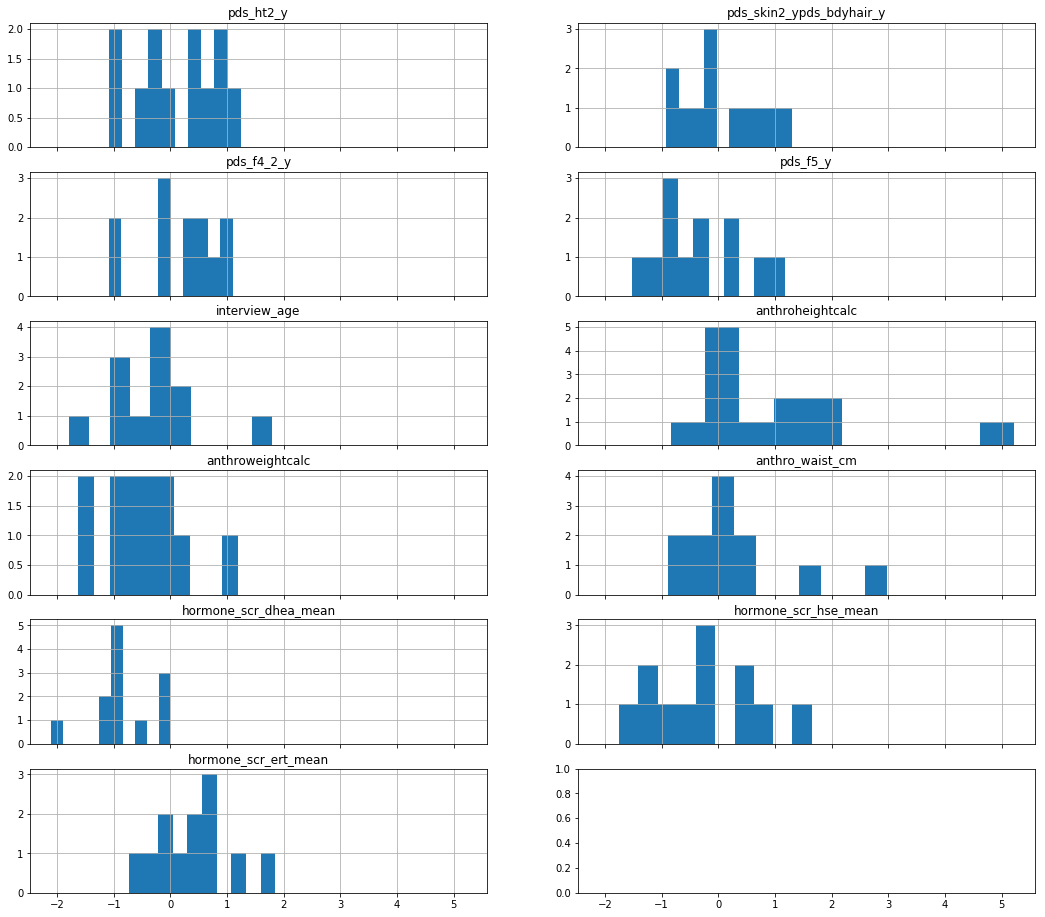

In [28]:
fig, axes = plt.subplots(nrows=6, ncols=2, sharex=True, figsize=(18, 16))

titles = names
# axes.flat returns the set of axes as a flat (1D) array instead
# of the two-dimensional version we used earlier
for ax, title, y in zip(axes.flat, titles, training):
    ax.hist(y)
    ax.set_title(title)
    ax.grid(True)

## Load in the rest of the mods you will need

In [32]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

Automatically created module for IPython interactive environment


## Define how many sample are present (rows), how many features (columns), and unique labels (get the unique integers of the labels from above)

In [30]:
n_samples, n_features = training.shape
labels = np.round(training_target,decimals=0)
n_digits = len(np.unique(labels))

NameError: name 'training_target' is not defined

In [ ]:
sample_size=903

## Now we are testing which K means works the best
### this is done with a couple of functions to test the different strategies based on the inputs above
This will do each for 10000 times, it takes about 80 seconds

In [ ]:
print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))
print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10000),
              name="k-means++", data=training)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10000),
              name="random", data=training)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(training)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=training)
print(82 * '_')

* silhouette =>The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. 
* Scores around zero indicate overlapping clusters.
* homogeneity: each cluster contains only members of a single class.
* completeness: all members of a given class are assigned to the same cluster.
* Bounded scores: 0.0 is as bad as it can be, 1.0 is a perfect score.
* Intuitive interpretation: clustering with bad V-measure can be qualitatively analyzed in terms of homogeneity and completeness to better feel what ‘kind’ of mistakes is done by the assignment.
* No assumption is made on the cluster structure: can be used to compare clustering algorithms such as k-means which assumes isotropic blob shapes with results of spectral clustering algorithms which can find cluster with “folded” shapes.

## Data reduction and visulaization using PCA
### This is further compressing the data to two components for graphical ease

In [ ]:
# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(training)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10000)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## This is getting the fit and predictions from the kmeans object

In [ ]:
for x in range(0,1000):
    kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=300)
    kmeans.fit(training)
    y_kmeans = kmeans.predict(training)
    clusters = kmeans.fit_predict(training)
    kmeans.cluster_centers_.shape

## This is a graphical representation of the fit

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(4, 2, 6)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)


## This is creating a matrix of all the scatter plots possible
Currently not working

In [ ]:

# import itertools
# import numpy as np
# import matplotlib.pyplot as plt

# def main(data, names, colors):
#     fig = scatterplot_matrix(data, names,
#             linestyle='none', marker='o', color=colors, mfc='none')
#     fig.suptitle('Simple Scatterplot Matrix')
#     plt.show()

# def scatterplot_matrix(data, names, **kwargs):
#     """Plots a scatterplot matrix of subplots.  Each row of "data" is plotted
#     against other rows, resulting in a nrows by nrows grid of subplots with the
#     diagonal subplots labeled with "names".  Additional keyword arguments are
#     passed on to matplotlib's "plot" command. Returns the matplotlib figure
#     object containg the subplot grid."""
#     numvars, numdata = data.shape
#     fig, axes = plt.subplots(nrows=numvars, ncols=numvars, figsize=(8,8))
#     fig.subplots_adjust(hspace=0.05, wspace=0.05)

#     for ax in axes.flat:
#         # Hide all ticks and labels
#         ax.xaxis.set_visible(False)
#         ax.yaxis.set_visible(False)

#         # Set up ticks only on one side for the "edge" subplots...
#         if ax.is_first_col():
#             ax.yaxis.set_ticks_position('left')
#         if ax.is_last_col():
#             ax.yaxis.set_ticks_position('right')
#         if ax.is_first_row():
#             ax.xaxis.set_ticks_position('top')
#         if ax.is_last_row():
#             ax.xaxis.set_ticks_position('bottom')

#     # Plot the data.
#     for i, j in zip(*np.triu_indices_from(axes, k=1)):
#         for x, y in [(i,j), (j,i)]:
#             axes[x,y].plot(data[x], data[y], **kwargs)

#     # Label the diagonal subplots...
#     for i, label in enumerate(names):
#         axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
#                 ha='center', va='center')

#     # Turn on the proper x or y axes ticks.
#     for i, j in zip(range(numvars), itertools.cycle((-1, 0))):
#         axes[j,i].xaxis.set_visible(True)
#         axes[i,j].yaxis.set_visible(True)

#     return fig

# main(training, names, y_kmeans)

## This is an accuracy score to compare the training target variables to the labels we generated

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(4):
    mask = (clusters == i)
    labels[mask] = mode(training_target[mask])[0]
#np.dtype(labels)
# for x in range(0,len(training_target)):
#      print(np.dtype(labels[x,]))
from sklearn.metrics import accuracy_score
accuracy_score(training_target.astype('int'), labels.astype('int'),normalize=False)


## This is a confusion matrix to see where errors may occur

In [ ]:
from sklearn.metrics import confusion_matrix
acks=['1','2','3','4']
mat = confusion_matrix(training_target.astype('int'), labels.astype('int'))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=acks,
            yticklabels=acks)
plt.xlabel('true label')
plt.ylabel('predicted label');
#looks like it is really good at getting 1, or messing up 1 and 2

## This is a Gaussian Mixture model to assess the probability of being in a given cluster

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.svm import SVC
#X = iris['data']
#y = iris['target']
#kmeans = KMeans(n_clusters=6).fit(X)
distances = np.column_stack([np.sum((training - center)**2, axis=1)**0.5 for center in kmeans.cluster_centers_])
svm = SVC().fit(distances.astype('int'), training_target.astype('int'))
print(svm)

## Function to randomly sample the data and perform the kmeans

n_digits: 3, 	 n_samples 60, 	 n_features 12
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.33s	532	0.455	0.510	0.481	0.360	0.437	0.284
random   	0.28s	532	0.455	0.510	0.481	0.360	0.437	0.284
PCA-based	0.00s	532	0.455	0.510	0.481	0.360	0.437	0.284
__________________________________________________________________________________
(60, 3)
(60,)
(60,)


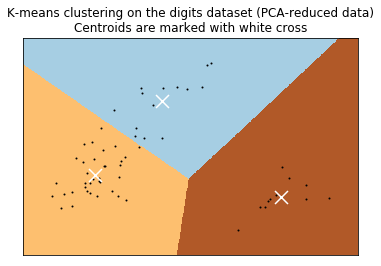

NameError: name 'cluster_space' is not defined

In [33]:

def random_selct(DATA):
    dictr = {}
    levels = ['lev1','lev2','lev3']
    i=1
    for lev in levels:
        if i < len(levels)+1:
            dictr[lev] = DATA[np.where(DATA[:,-1] == i)]
            i=i+1
        else:
            break

    rand_dict={}
    target_dict={}
    for key, value in dictr.iteritems():
        #print(key)
        #print(value.shape)
        ind = np.random.permutation(value.shape[0])#random index
        training_idx = ind[:20]#get 20 subjects indexes
        training = value[training_idx,:]#select 20 subjects from the value in the dictionary
        labels_true = value[:,-1] #get the labels from the value in the dictiornary last column
        target_dict[key] = labels_true[training_idx]#add targets to dictionary
        rand_dict[key] = training

        #combine
    data=np.vstack((rand_dict['lev1'],rand_dict['lev2'],rand_dict['lev3']))
    data=np.delete(data,12,1)
    targets=np.hstack((target_dict['lev1'],target_dict['lev2'],target_dict['lev3']))

    n_samples, n_features = data.shape
    labels = np.round(targets)
    n_digits = len(np.unique(targets))
    sample_size=n_samples

    ############################
    ####start the k meaning#####
    ############################

    ### making a cute table################### making a cute table###################
    print("n_digits: %d, \t n_samples %d, \t n_features %d"##########################
          % (n_digits, n_samples, n_features))### making a cute table################
    print(82 * '_')##################################################################
    print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')########
    #################################################################################

    def bench_k_means(estimator, name, data):
        t0 = time() #time
        estimator.fit(data) #estimating the fit 
        print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
              % (name, (time() - t0), estimator.inertia_,
                 metrics.homogeneity_score(labels, estimator.labels_),
                 metrics.completeness_score(labels, estimator.labels_),
                 metrics.v_measure_score(labels, estimator.labels_),
                 metrics.adjusted_rand_score(labels, estimator.labels_),
                 metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
                 metrics.silhouette_score(data, estimator.labels_,
                                          metric='euclidean',
                                          sample_size=sample_size)))

    bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=300),
                  name="k-means++", data=data)

    bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=300),
                  name="random", data=data)

    # in this case the seeding of the centers is deterministic, hence we run the
    # kmeans algorithm only once with n_init=1
    pca = PCA(n_components=n_digits).fit(data)
    bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
                  name="PCA-based",
                  data=data)
    print(82 * '_')
    
    kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=300)
    ####THINGS TO SAVE#########
    kmeans.fit(data)
    y_kmeans = kmeans.predict(data)
    clusters = kmeans.fit_predict(data)
    cluster_space = kmeans.fit_transform(data)
    print(cluster_space.shape)
    print(clusters.shape)
    print(y_kmeans.shape)
    
        # #############################################################################
    # Visualize the results on PCA-reduced data

    reduced_data = PCA(n_components=2).fit_transform(data)
    kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10000)
    kmeans.fit(reduced_data)

    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()



n_digits: 3, 	 n_samples 60, 	 n_features 12
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.34s	458	0.475	0.538	0.504	0.359	0.457	0.310
random   	0.29s	458	0.475	0.538	0.504	0.359	0.457	0.310
PCA-based	0.00s	613	0.457	0.470	0.463	0.404	0.439	0.102
__________________________________________________________________________________
(60, 3)
(60,)
(60,)


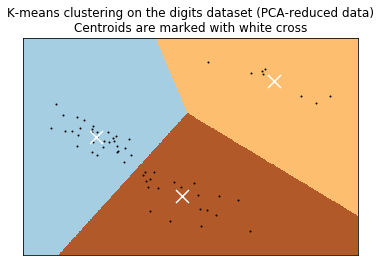

n_digits: 3, 	 n_samples 60, 	 n_features 12
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.34s	512	0.467	0.538	0.500	0.359	0.449	0.307
random   	0.29s	512	0.467	0.538	0.500	0.359	0.449	0.307
PCA-based	0.00s	638	0.538	0.554	0.546	0.500	0.523	0.122
__________________________________________________________________________________
(60, 3)
(60,)
(60,)


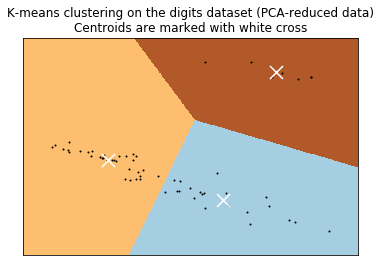

n_digits: 3, 	 n_samples 60, 	 n_features 12
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.36s	627	0.481	0.562	0.518	0.368	0.463	0.316
random   	0.30s	627	0.481	0.562	0.518	0.368	0.463	0.316
PCA-based	0.00s	648	0.487	0.562	0.522	0.368	0.469	0.287
__________________________________________________________________________________
(60, 3)
(60,)
(60,)


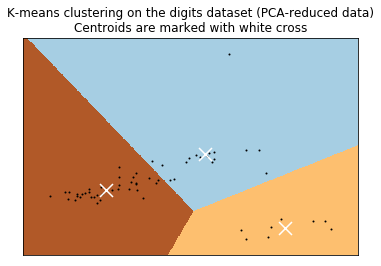

n_digits: 3, 	 n_samples 60, 	 n_features 12
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.30s	434	0.538	0.667	0.595	0.415	0.522	0.322
random   	0.25s	434	0.538	0.667	0.595	0.415	0.522	0.322
PCA-based	0.00s	436	0.487	0.562	0.522	0.368	0.469	0.299
__________________________________________________________________________________
(60, 3)
(60,)
(60,)


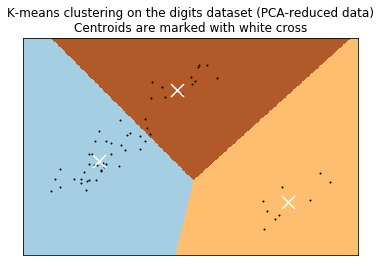

n_digits: 3, 	 n_samples 60, 	 n_features 12
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.33s	577	0.477	0.550	0.511	0.362	0.459	0.304
random   	0.26s	577	0.477	0.550	0.511	0.362	0.459	0.304
PCA-based	0.00s	578	0.481	0.562	0.518	0.368	0.463	0.308
__________________________________________________________________________________
(60, 3)
(60,)
(60,)


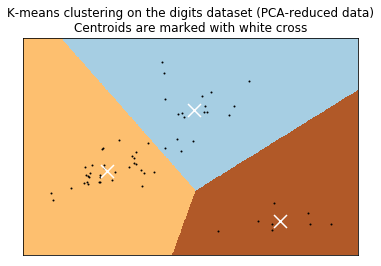

n_digits: 3, 	 n_samples 60, 	 n_features 12
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.36s	499	0.471	0.552	0.508	0.364	0.452	0.291
random   	0.30s	499	0.471	0.552	0.508	0.364	0.452	0.291
PCA-based	0.00s	603	0.478	0.493	0.485	0.424	0.460	0.140
__________________________________________________________________________________
(60, 3)
(60,)
(60,)


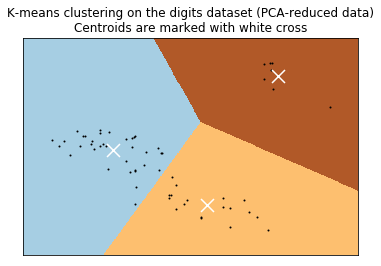

n_digits: 3, 	 n_samples 60, 	 n_features 12
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.38s	483	0.485	0.538	0.510	0.366	0.468	0.301
random   	0.32s	483	0.485	0.538	0.510	0.366	0.468	0.301
PCA-based	0.00s	483	0.483	0.539	0.509	0.362	0.465	0.304
__________________________________________________________________________________
(60, 3)
(60,)
(60,)


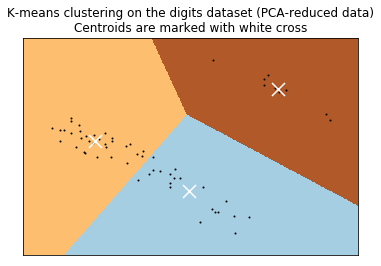

n_digits: 3, 	 n_samples 60, 	 n_features 12
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.35s	564	0.483	0.551	0.515	0.363	0.466	0.323
random   	0.27s	564	0.483	0.551	0.515	0.363	0.466	0.323
PCA-based	0.00s	631	0.422	0.549	0.478	0.427	0.401	0.318
__________________________________________________________________________________
(60, 3)
(60,)
(60,)


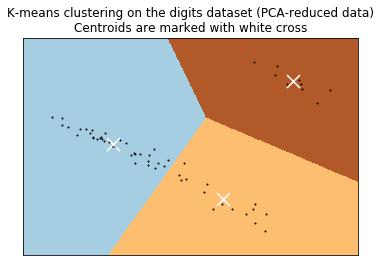

n_digits: 3, 	 n_samples 60, 	 n_features 12
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.32s	596	0.416	0.542	0.471	0.408	0.395	0.312
random   	0.25s	596	0.416	0.542	0.471	0.408	0.395	0.312
PCA-based	0.00s	597	0.484	0.623	0.545	0.463	0.465	0.309
__________________________________________________________________________________
(60, 3)
(60,)
(60,)


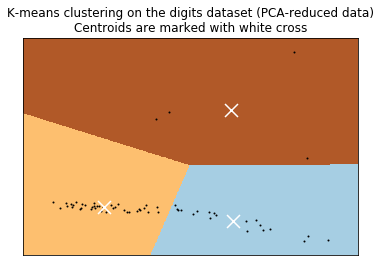

n_digits: 3, 	 n_samples 60, 	 n_features 12
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.35s	427	0.523	0.608	0.562	0.416	0.507	0.311
random   	0.31s	427	0.523	0.608	0.562	0.416	0.507	0.311
PCA-based	0.00s	427	0.523	0.608	0.562	0.416	0.507	0.311
__________________________________________________________________________________
(60, 3)
(60,)
(60,)


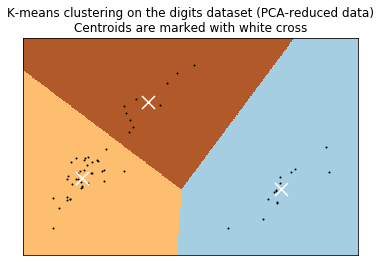

In [38]:
n = 10
CS_dct={}
Cluster_dct={}

for x in range(0,n):
    random_selct(trans)
    #CS_dct['arr%i'%x]=cluster_space
    #Cluster_dct['arr%i'%x]=clusters
    

X=np.empty([60, 4])

for key,value in CS_dct.iteritems():
    X=(np.array(X) + np.array(value)) 
    
final = X/n

In [44]:
globals()

{'ALLOW_THREADS': 1,
 'Axes3D': mpl_toolkits.mplot3d.axes3d.Axes3D,
 'AxisError': numpy.core._internal.AxisError,
 'BUFSIZE': 8192,
 'CLIP': 0,
 'CS_dct': {},
 'Cluster_dct': {},
 'ComplexWarning': numpy.core.numeric.ComplexWarning,
 'DataSource': numpy.lib._datasource.DataSource,
 'ERR_CALL': 3,
 'ERR_DEFAULT': 521,
 'ERR_IGNORE': 0,
 'ERR_LOG': 5,
 'ERR_PRINT': 4,
 'ERR_RAISE': 2,
 'ERR_WARN': 1,
 'FLOATING_POINT_SUPPORT': 1,
 'FPE_DIVIDEBYZERO': 1,
 'FPE_INVALID': 8,
 'FPE_OVERFLOW': 2,
 'FPE_UNDERFLOW': 4,
 'False_': False,
 'GaussianMixture': sklearn.mixture.gaussian_mixture.GaussianMixture,
 'Imputer': sklearn.preprocessing.imputation.Imputer,
 'In': ['',
  u'import numpy as np\nfrom sklearn.cluster import KMeans\nimport pandas as pd\nfrom mpl_toolkits.mplot3d import Axes3D\nfrom sklearn.preprocessing import scale\n\nimport sklearn.metrics as sm\nfrom sklearn.metrics import confusion_matrix\nimport matplotlib.pyplot as plt\nimport matplotlib\nfrom sklearn import datasets\nfrom sk

In [40]:
ykmeans


NameError: name 'ykmeans' is not defined